In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

Dataframe from MDA_merge_data.ipynb is loaded, datetime column is dropped in order to run model.

In [25]:
df = pd.read_csv("C:\\Users\Arthur\hello\MDA_dataframeArthurKMI.csv")
df_nd = df.drop('result_timestamp', axis=1)

In [3]:
# Drop the datetime column
df_nd = df.drop('result_timestamp', axis=1)

The target dataset (y) and predictor dataset (X) are created. For y, noise is converted to relative noise (proportion of max value)

In [4]:
y = df_nd["laeq"] / df_nd["laeq"].max()
X = df_nd.drop("laeq", axis="columns")

In [5]:
#convert noise to relative noise (or relative crowdedness) as target (y), create dataframe with predictors only (X)
y = df_nd["laeq"] / df_nd["laeq"].max()
X = df_nd.drop("laeq", axis="columns")

In [6]:
#create time-sensitive split for cross-validation
ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=4320,
    max_train_size=10000,
    test_size=1000,
)

In [7]:
#inspect splits
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]
X.iloc[test_0]
X.iloc[train_0]

,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,...,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3,air_pressure,air_temperature,relative_humidity,precipitation,wind_speed,wind_direction
30922,11,4,5,8,0,71.0,19.28,32.0,257.0,0.0,...,24.78,24.78,24.723,23.846788,1013.26,23.45,63.79,0.0,5.40,305.3
30923,11,4,5,8,0,70.0,19.13,32.0,240.0,0.0,...,24.84,24.84,24.783,24.193493,1013.46,23.15,63.22,0.0,5.22,299.2
30924,11,4,5,8,0,70.0,19.06,31.0,234.0,0.0,...,24.78,24.78,24.723,24.126774,1013.59,23.04,63.18,0.0,5.61,304.6
30925,11,4,5,8,0,69.0,18.84,32.0,229.0,0.0,...,24.87,24.87,24.813,24.144667,1013.72,23.25,62.01,0.0,5.55,298.4
30926,12,4,5,8,0,68.0,18.81,32.0,191.0,0.0,...,24.99,24.99,24.933,24.224405,1013.72,23.31,62.39,0.0,5.65,302.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40917,2,4,28,10,0,91.0,13.00,38.0,0.0,0.0,...,14.39,14.39,14.333,14.198870,1017.68,16.55,80.25,0.0,6.88,165.7
40918,2,4,28,10,0,90.0,12.83,37.0,0.0,0.0,...,14.39,14.39,14.333,14.185340,1017.66,16.68,80.08,0.0,6.99,166.3
40919,2,4,28,10,0,90.0,12.78,38.0,0.0,0.0,...,14.39,14.39,14.333,14.206740,1017.68,16.56,79.75,0.0,6.42,165.4
40920,2,4,28,10,0,90.0,12.78,37.0,0.0,0.0,...,14.39,14.39,14.333,14.314940,1017.44,16.64,79.61,0.0,7.02,167.1


In [8]:
train_4, test_4 = all_splits[4]
X.iloc[test_4]
X.iloc[train_4]

,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,...,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3,air_pressure,air_temperature,relative_humidity,precipitation,wind_speed,wind_direction
34922,9,4,16,9,0,84.0,13.90,32.0,163.0,0.0,...,16.59,16.59,16.533,16.339917,1008.95,17.77,69.49,0.00,8.11,359.7
34923,9,4,16,9,0,82.0,13.60,32.0,210.0,0.0,...,16.78,16.78,16.723,16.384344,1008.97,17.63,70.59,0.00,8.05,359.5
34924,9,4,16,9,0,79.0,13.46,31.0,165.0,0.0,...,17.07,17.07,17.013,16.527561,1009.02,17.61,71.20,0.00,8.94,353.8
34925,9,4,16,9,0,79.0,13.63,32.0,144.0,0.0,...,17.31,17.31,17.253,16.762182,1009.04,17.53,71.46,0.00,8.68,353.1
34926,9,4,16,9,0,80.0,14.00,32.0,142.0,0.0,...,17.49,17.49,17.433,16.968314,1009.04,17.66,71.54,0.00,8.26,352.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44917,23,3,24,11,0,86.0,6.88,37.0,0.0,0.0,...,9.11,9.11,9.053,9.123540,999.67,9.50,86.47,0.00,9.36,192.7
44918,23,3,24,11,0,86.0,6.92,38.0,0.0,0.0,...,9.17,9.17,9.113,9.154146,999.64,9.53,86.57,0.03,8.66,191.4
44919,23,3,24,11,0,85.0,6.81,37.0,0.0,0.0,...,9.22,9.22,9.163,9.262167,999.61,9.50,86.58,0.00,8.84,186.4
44920,23,3,24,11,0,85.0,6.78,38.0,0.0,0.0,...,9.22,9.22,9.163,9.232913,999.91,9.45,86.33,0.00,9.20,191.1


In [9]:
# grid search for hyperparameter tuning

param_grid = {
    'learning_rate': (0.01, 0.02, 0.03, 0.04),
    'n_estimators': (50, 60, 70),
    'max_depth' : (2, 3, 4)}
model = xgb.XGBRegressor()
model_grid_search = GridSearchCV(model, param_grid=param_grid,
                                 n_jobs=2, cv=ts_cv)
model_grid_search.fit(X, y)


GridSearchCV(cv=TimeSeriesSplit(gap=4320, max_train_size=10000, n_splits=5, test_size=1000),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=2,
             param_grid={'learning_rate': (0.01, 0.02, 0.03, 0.04),
                         'max_depth': (2, 3, 4), 'n_estimators': (50, 60, 70)})

In [10]:
accuracy = model_grid_search.score(X, y)
print(
    f"The test accuracy score of the grid-searched pipeline is: "
    f"{accuracy:.2f}"
)

The test accuracy score of the grid-searched pipeline is: 0.67


In [11]:
model_grid_search.predict(X.iloc[0:5])

array([0.50697976, 0.50697976, 0.50697976, 0.50697976, 0.50697976],
      dtype=float32)

In [12]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")

The best set of parameters is: {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 60}


In [13]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25,0.745373,0.036023,0.007782,0.000979,0.03,4,60,"{'learning_rate': 0.03, 'max_depth': 4, 'n_est...",0.766262,0.625381,0.775730,0.723185,0.466239,0.671359,0.115563,1
33,0.648755,0.044994,0.007682,0.000981,0.04,4,50,"{'learning_rate': 0.04, 'max_depth': 4, 'n_est...",0.777388,0.655742,0.781016,0.734175,0.407609,0.671186,0.139299,2
30,0.534496,0.115863,0.008580,0.002416,0.04,3,50,"{'learning_rate': 0.04, 'max_depth': 3, 'n_est...",0.746687,0.699849,0.763861,0.727217,0.417071,0.670937,0.128705,3
23,0.624514,0.009978,0.007781,0.000978,0.03,3,70,"{'learning_rate': 0.03, 'max_depth': 3, 'n_est...",0.755006,0.711176,0.764944,0.731051,0.391993,0.670834,0.140675,4
22,0.542168,0.016999,0.007382,0.000488,0.03,3,60,"{'learning_rate': 0.03, 'max_depth': 3, 'n_est...",0.731878,0.682599,0.757740,0.714780,0.463834,0.670166,0.106015,5


In [14]:
# get the parameter names
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]

In [15]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,param_learning_rate,param_n_estimators,param_max_depth,mean_test_score,std_test_score,rank_test_score
25,0.03,60,4,0.671359,0.115563,1
33,0.04,50,4,0.671186,0.139299,2
30,0.04,50,3,0.670937,0.128705,3
23,0.03,70,3,0.670834,0.140675,4
22,0.03,60,3,0.670166,0.106015,5
26,0.03,70,4,0.668810,0.149137,6
31,0.04,60,3,0.660098,0.166682,7
34,0.04,60,4,0.658484,0.173389,8
24,0.03,50,4,0.649417,0.085411,9
21,0.03,50,3,0.645308,0.065060,10


In [16]:
pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score", index=["param_learning_rate"],
    columns=["param_n_estimators"])

pivoted_cv_results

param_n_estimators,50,60,70
param_learning_rate,,,
0.01,-0.101485,0.069853,0.206061
0.02,0.469676,0.561060,0.614367
0.03,0.631813,0.656504,0.657383
0.04,0.658281,0.648981,0.633205


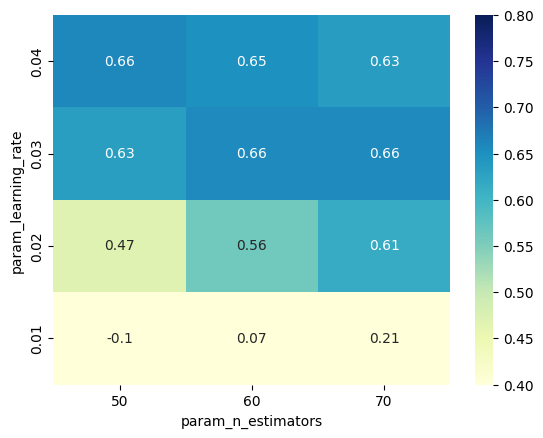

In [17]:
import seaborn as sns

ax = sns.heatmap(pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.4,
                 vmax=0.8)
ax.invert_yaxis()

In [21]:
#run XGBoost model
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

gbrt_pipeline = make_pipeline(xgb.XGBRegressor(learning_rate=0.03,n_estimators=60,max_depth=4)).set_output(transform="pandas")

evaluate(gbrt_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.035 +/- 0.006
Root Mean Squared Error: 0.044 +/- 0.007


In [29]:
#feature importance
xgb_reg = xgb.XGBRegressor(learning_rate=0.03,n_estimators=60,max_depth=4, importance_type='gain').fit(X,y)
xgb_reg.get_booster().get_score(importance_type='gain')


{'hour': 9.507387161254883,
 'day': 1.7881195545196533,
 'day_of_month': 0.12159735709428787,
 'month': 0.7131723165512085,
 'LC_HUMIDITY': 0.05013620853424072,
 'LC_RAD': 0.8558928370475769,
 'LC_RAD60': 0.3198906481266022,
 'LC_TEMP_QCL0': 0.13731786608695984,
 'LC_TEMP_QCL3': 0.14837610721588135,
 'air_pressure': 0.15276198089122772,
 'air_temperature': 0.5443301796913147,
 'relative_humidity': 0.11648125946521759}

In [27]:
weight = xgb_reg.get_booster().get_score(importance_type='weight')
gain = xgb_reg.get_booster().get_score(importance_type='gain')
cover = xgb_reg.get_booster().get_score(importance_type='cover')
total_gain = xgb_reg.get_booster().get_score(importance_type='total_gain')
total_cover = xgb_reg.get_booster().get_score(importance_type='total_cover')

f_importance_weight = xgb_reg.get_booster().get_score(importance_type='weight')
importance_df_weight = pd.DataFrame.from_dict(data=f_importance_weight, 
                                       orient='index')
f_importance_gain = xgb_reg.get_booster().get_score(importance_type='gain')
importance_df_gain = pd.DataFrame.from_dict(data=f_importance_gain, 
                                       orient='index')
f_importance_cover = xgb_reg.get_booster().get_score(importance_type='cover')
importance_df_cover = pd.DataFrame.from_dict(data=f_importance_cover, 
                                       orient='index')
f_importance_total_gain = xgb_reg.get_booster().get_score(importance_type='total_gain')
importance_df_total_gain = pd.DataFrame.from_dict(data=f_importance_total_gain, 
                                       orient='index')
f_importance_total_cover = xgb_reg.get_booster().get_score(importance_type='total_cover')
importance_df_total_cover = pd.DataFrame.from_dict(data=f_importance_total_cover, 
                                       orient='index')

feature_importance = pd.concat([importance_df_weight, importance_df_gain, importance_df_cover, importance_df_total_gain, importance_df_total_cover], axis=1)
feature_importance

,0,0,0,0,0
hour,401.0,9.507387,18093.847656,3812.462158,7255633.0
day,248.0,1.788120,11365.814453,443.453644,2818722.0
day_of_month,16.0,0.121597,1901.562500,1.945558,30425.0
month,127.0,0.713172,6242.448730,90.572884,792791.0
LC_HUMIDITY,1.0,0.050136,168.000000,0.050136,168.0
LC_RAD,28.0,0.855893,20220.572266,23.965000,566176.0
LC_RAD60,18.0,0.319891,4087.722168,5.758032,73579.0
LC_TEMP_QCL0,1.0,0.137318,893.000000,0.137318,893.0
LC_TEMP_QCL3,1.0,0.148376,1498.000000,0.148376,1498.0
air_pressure,4.0,0.152762,2050.500000,0.611048,8202.0
